<a href="https://colab.research.google.com/github/rugadamanikanta/Airbnb-Booking-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Collecting and loading data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd
% matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [71]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48895,NaN,NaN,NaN,1.90171e+07,1.09831e+07,2539,9.47194e+06,1.96773e+07,2.91522e+07,3.64872e+07
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895,NaN,NaN,NaN,6.762e+07,7.8611e+07,2438,7.82203e+06,3.07938e+07,1.07434e+08,2.74321e+08
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895,NaN,NaN,NaN,40.7289,0.0545301,40.4998,40.6901,40.7231,40.7631,40.9131
longitude,48895,NaN,NaN,NaN,-73.9522,0.0461567,-74.2444,-73.9831,-73.9557,-73.9363,-73.713
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895,NaN,NaN,NaN,152.721,240.154,0,69,106,175,10000


# **Exprimenting On Data set**

Checking For Duplicates

In [7]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


**From the following expriments, listing having 0 reviewes in number_of_reviews data in same row last Review and Reviews per month doesn't have any values it was showing NAN, we can can conclude that may be newly listed or does'nt have any occupancy till now.**

**In following second cell we can see after removing data of "0" reviews we doesnt see any non Null values in last Review and Reviews per month data.**

After seperating data i found some interesting thing why these 10052 listing have 0 riviews, 

*   25% of listing kept their avaliablity was 0 day. that mean they just listed but not interested in it. 50% of listing kept their avaliablity was 6 day.
*   25% of listing kept their price above 200$ Due to high cost these listing may have 0 occupency




In [8]:
zero_reviewd_listings=df[df['number_of_reviews']==0]
zero_reviewd_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10052 non-null  int64  
 1   name                            10042 non-null  object 
 2   host_id                         10052 non-null  int64  
 3   host_name                       10047 non-null  object 
 4   neighbourhood_group             10052 non-null  object 
 5   neighbourhood                   10052 non-null  object 
 6   latitude                        10052 non-null  float64
 7   longitude                       10052 non-null  float64
 8   room_type                       10052 non-null  object 
 9   price                           10052 non-null  int64  
 10  minimum_nights                  10052 non-null  int64  
 11  number_of_reviews               10052 non-null  int64  
 12  last_review                     

In [9]:
non_zero_review_listins=df[~(df['number_of_reviews']==0)]
non_zero_review_listins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

In [10]:
zero_reviewd_listings.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10052,NaN,NaN,NaN,2.25748e+07,1.13556e+07,3647,1.2084e+07,2.33776e+07,3.40209e+07,3.64872e+07
name,10042,9884,Hillside Hotel,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,10052,NaN,NaN,NaN,8.06844e+07,8.71259e+07,4632,1.20752e+07,3.97954e+07,1.33e+08,2.74321e+08
host_name,10047,3816,Blueground,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,10052,5,Manhattan,5029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,10052,193,Williamsburg,757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,10052,NaN,NaN,NaN,40.7321,0.0525979,40.4998,40.6976,40.7289,40.7636,40.9117
longitude,10052,NaN,NaN,NaN,-73.9561,0.0437957,-74.2429,-73.9848,-73.9602,-73.9399,-73.7169
room_type,10052,3,Entire home/apt,5077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,10052,NaN,NaN,NaN,192.919,358.653,0,70,120,200,10000


In [11]:
non_zero_review_listins.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,38843,NaN,NaN,NaN,1.80965e+07,1.06937e+07,2539,8.72003e+06,1.88715e+07,2.75548e+07,3.64558e+07
name,38837,38269,Home away from home,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,38843,NaN,NaN,NaN,6.42391e+07,7.58885e+07,2438,7.03382e+06,2.83719e+07,1.01846e+08,2.73842e+08
host_name,38827,9886,Michael,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,38843,5,Manhattan,16632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,38843,218,Williamsburg,3163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,38843,NaN,NaN,NaN,40.7281,0.0549903,40.5064,40.6886,40.7217,40.763,40.9131
longitude,38843,NaN,NaN,NaN,-73.9511,0.0466945,-74.2444,-73.9825,-73.9548,-73.935,-73.713
room_type,38843,3,Entire home/apt,20332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,38843,NaN,NaN,NaN,142.318,196.946,0,69,101,170,10000


From below four experiments we can conclude that no of unique **host id**'s are more compare to **host names** and some people may have same name but cant have same id's, we can't consider these names are duplicate but may be a different persons

From above experiments i just filtered only "JOHN" it was result of 294 outcomes, of this 188 different host ids

But from data i just considered John(as first person in list) host Id 2787 as it only having 6 listing on that host id and we can as see 'calculated_host_listings_count' it was showing that host was listed 6 properties.	

In [12]:
df['host_id'].nunique() #expermenting

37457

In [13]:
df['host_name'].nunique() #expirementing

11452

In [14]:
jondf=df[df['host_name']=='John']
len(jondf),jondf['host_id'].nunique()

(294, 188)

In [15]:
jondf[jondf['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


**From below outcomes we can conclude that neighbourhood_group created with colabrating group of areas where neighbourhood_group consisted only 5 main area of total data.**

**where as neighbourhood are may be sub areas in neighbourhood_groups. total no of places are listed are 221, from this we mostly have to deal with neighbourhood_group data for best outcomes.**

In [16]:
df['neighbourhood_group'].unique() #experiment

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
df['neighbourhood'].nunique() #expriment

221

**From the following data we seen a listing that have maximum reviews among all given data. interestingly that was located in Queens but not it either Brooklyn and Manhattan.**


In [18]:
max_reviews=df[df['number_of_reviews']==df['number_of_reviews'].max()]
max_reviews.number_of_reviews.values

array([629])

**From the following data we seen a listing that have maximum reviews per month among all given data.**

In [19]:
max_reviews_permonth=df[df['reviews_per_month']==df['reviews_per_month'].max()]
max_reviews_permonth.reviews_per_month.values

array([58.5])

In [20]:
max_reviews_permonth['host_id'].values

array([244361589])

In [21]:
tesing=df[df['host_id']==244361589]
tesing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42074,32678718,Luxury accommodation minutes from Central Park!,244361589,Row NYC,Manhattan,Theater District,40.75781,-73.98903,Private room,499,1,0,NaN,NaN,9,293
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
42077,32678721,Nice Room 1 block away from Times Square action!,244361589,Row NYC,Manhattan,Theater District,40.75783,-73.98908,Private room,100,1,38,2019-07-04,14.62,9,295
42078,32678723,Spacious room in the Heart of Midtown!,244361589,Row NYC,Manhattan,Theater District,40.75803,-73.98887,Private room,100,1,6,2019-06-15,2.61,9,289
42079,32678724,Steps from varied cuisines at Restaurant Row!,244361589,Row NYC,Manhattan,Theater District,40.75792,-73.98900,Private room,249,1,0,NaN,NaN,9,278
42080,32678725,Enjoy the Times Square experience with the fam...,244361589,Row NYC,Manhattan,Theater District,40.75976,-73.98761,Private room,249,1,22,2019-06-23,7.59,9,283
42081,32678726,Steps away from the Heart of the Theater Distr...,244361589,Row NYC,Manhattan,Theater District,40.75925,-73.98767,Private room,100,1,1,2019-05-04,0.45,9,299
42082,32678727,In the center of all Broadway Theater ACTION!,244361589,Row NYC,Manhattan,Theater District,40.75821,-73.98820,Private room,249,1,0,NaN,NaN,9,298


**From following experiment i just tried to use location data plot on x and y axies resulted a below output. As data was from NYC with 5 particular areas.**

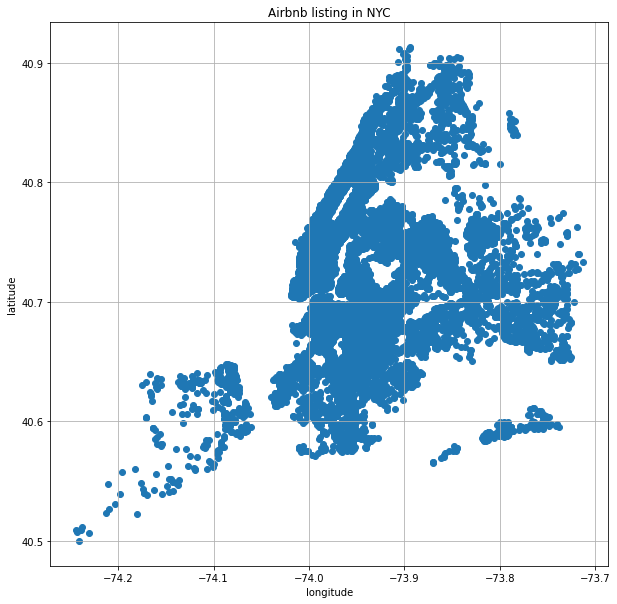

In [22]:
plt.rcParams['figure.figsize'] = (10,10)
plt.grid()
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.title('Airbnb listing in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

#  **Cleaning dataset**

The next step is cleaning up the data, oftentimes the data we load have various faults, such as missing value, incomplete data, etc. By doing cleaning up, the data quality will have better quality to be used for further analysis.

**a. Checking column with missing values**

**b. Removing redundant variables**

**c. Replacing all the missing values**

In [23]:
cdf=df.copy() # creating a copy keeping original data safe

From Date i seen there is no use from last Review column, and as it had 10052 non null values. i am droping this column.


In [24]:
cdf.drop(['last_review'], axis=1,inplace=True)

**From following data information in the column of 'name' and 'host_name' very amount data is missing for reviews_per_month column i justified in above only.**

we going fill the missing name and host_name with "NO NAME"

In [25]:
cdf.info() # see we can see in the data last review column was removed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [26]:
cdf['name'].fillna('No Name',inplace=True)
cdf['host_name'].fillna('NO_NAME',inplace=True)
cdf.dropna(inplace=True)

In [27]:
cdf.isnull().sum() #checking null values!

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [28]:
cdf.shape

(38843, 15)

# **Exploring and visualizing data**

## Neighborhood Group


In [29]:
Host_by_location=cdf.groupby(['neighbourhood_group'])['id'].count()
Host_by_location

neighbourhood_group
Bronx              876
Brooklyn         16447
Manhattan        16632
Queens            4574
Staten Island      314
Name: id, dtype: int64

Most of the listing have been take placed at Brooklyn and Manhattan, in queens listing are mid range, but where as in Bronx and staten island has low listing 

Text(0.5, 0, 'Locations')

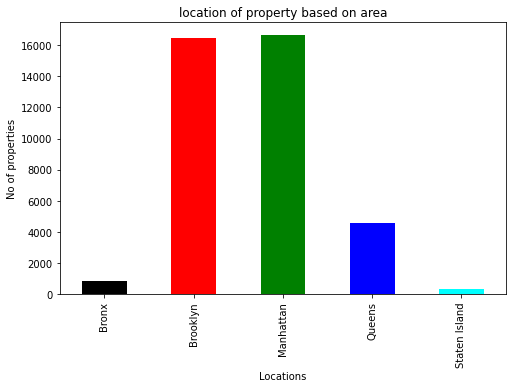

In [30]:
plt.rcParams['figure.figsize'] = (8, 5)
Host_by_location.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.title('location of property based on area')
plt.ylabel('No of properties')
plt.xlabel('Locations')

# Set the display figure size using rcParams method 

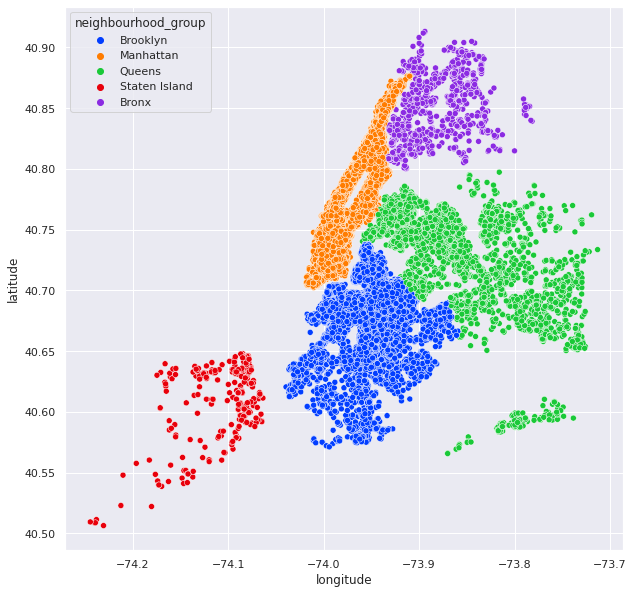

In [31]:
sns.set_theme()
plt.rcParams['figure.figsize'] = (10,10)
sns.scatterplot(x='longitude', y='latitude',data=cdf, hue='neighbourhood_group',palette='bright')


## Room Type

In [32]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [33]:
TypesOfProperty=cdf.groupby(['room_type'])['id'].count()
TypesOfProperty

room_type
Entire home/apt    20332
Private room       17665
Shared room          846
Name: id, dtype: int64

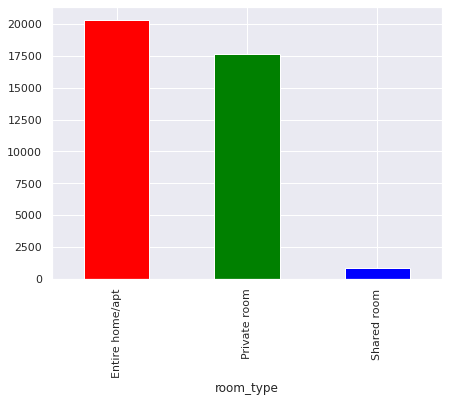

In [34]:
plt.rcParams['figure.figsize'] = (7, 5)
TypesOfProperty.plot(kind='bar',color=[ 'red', 'green', 'blue'])

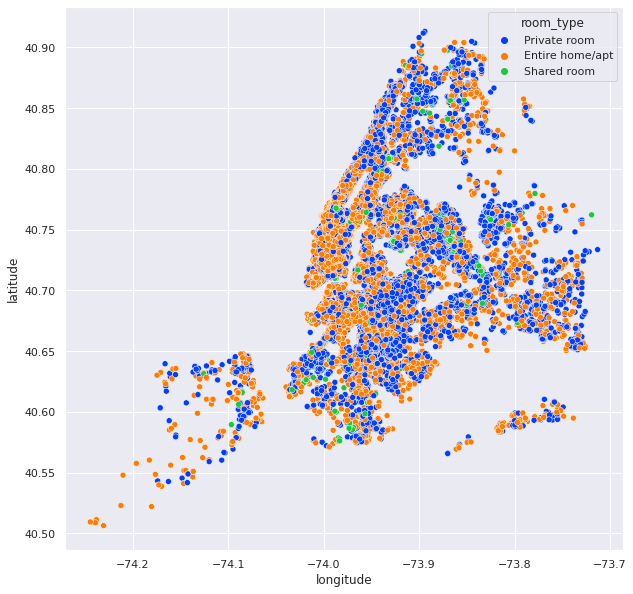

In [35]:
sns.set_theme()
plt.rcParams['figure.figsize'] = (10,10)
sns.scatterplot(x='longitude', y='latitude',data=cdf, hue='room_type',palette='bright')

In [36]:
property_based_on_location=cdf.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()
property_based_on_location

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,309,524,43
Brooklyn,8164,7993,290
Manhattan,9967,6309,356
Queens,1742,2680,152
Staten Island,150,159,5


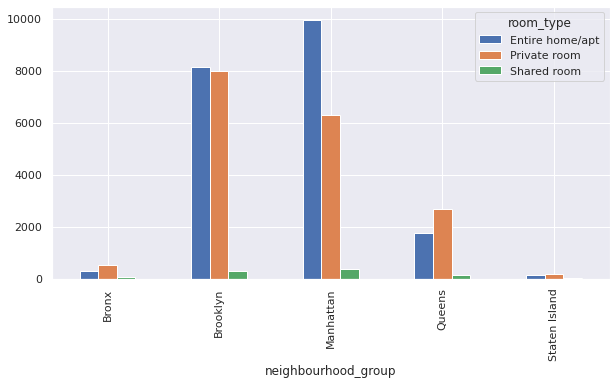

In [37]:
plt.rcParams['figure.figsize'] = (10, 5)
property_based_on_location.plot(kind='bar')

## Price

In [38]:
len(cdf[cdf['price']==0])

10

Hear some of the listing are listed at **'0'** price. The count of this these listing are about **'10'**. As listing are keept there price '0' intensionally. They may charge for other services like Food, internet... 

In [39]:
cdf[cdf['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139


From following density plot we can consider that most of listing are less than under 500$ only, and the maximum price of listing was about 10000 dollers. 

from following graph we can see a lot of outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


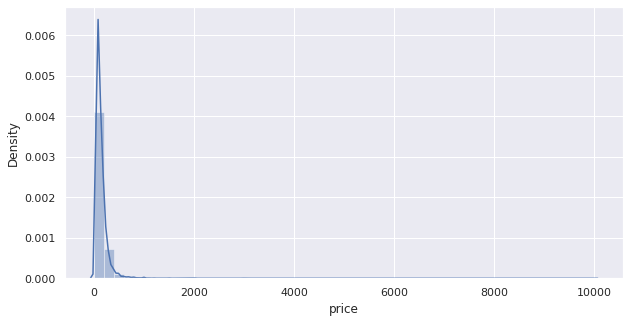

In [40]:
# price_of_listings=cdf['price']
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.distplot(cdf['price'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


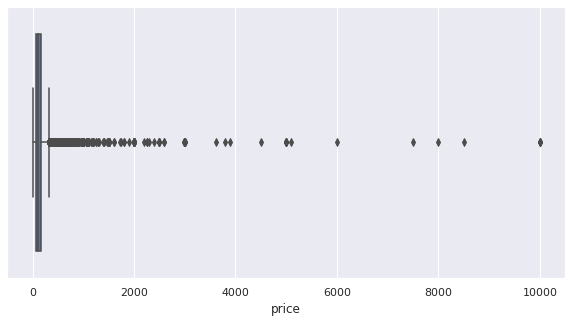

In [41]:
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.boxplot(cdf['price'])

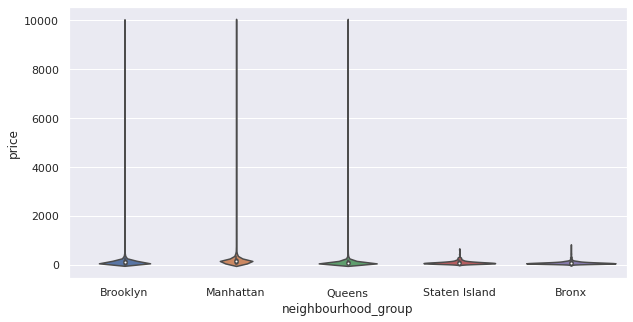

In [42]:
plt.rcParams['figure.figsize'] = (10, 5)
ax= sns.violinplot(x='neighbourhood_group',y='price',data=cdf)
# 5 Out of 3 area's in listing are listed with higest price about 10000$ rest of 2 place's wear around in 2000$-5000$ 
# From this we can conclude that Brookly, Manhattan and Qunees are high drive places.so this places have higest price in listings.

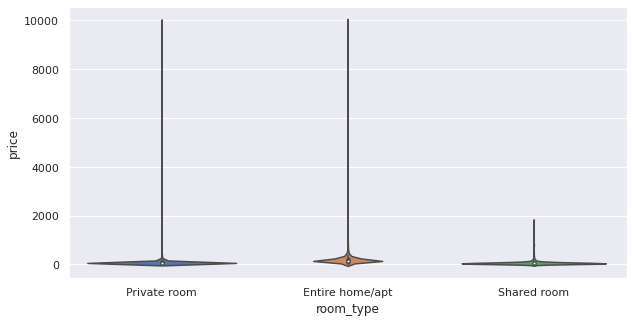

In [43]:
ax= sns.violinplot(x='room_type',y='price',data=cdf)
# After drafting plot based on type of rooms, as we expected only sharing type of rooms are listd with low cost.

**From all above graph we can see the outliers of price for listings we going to remove the outliers detection by using Inter Qrartile Range(IQR) method.**

In [44]:
percentile_q1 = np.percentile(cdf['price'],25)
print(percentile_q1)
percentile_q2 = np.percentile(cdf['price'],50)
print(percentile_q2)
percentile_q3 = np.percentile(cdf['price'],75)
print(percentile_q3)

69.0
101.0
170.0


In [45]:
IQR=percentile_q3-percentile_q1
print(IQR)
lower_side_outlier=percentile_q1-(1.5)*IQR
print(lower_side_outlier)
upper_side_outlier=percentile_q3+(1.5)*IQR
print(upper_side_outlier)

101.0
-82.5
321.5


In [46]:
new_data=cdf[(cdf['price']>lower_side_outlier) & (cdf['price']<upper_side_outlier )]
len(new_data)

36766

After removing outliers in the price column now data length was only **36766** and orignal data was **38843**. hear total outliers in the listing was lessthan 6%. 

After removing outliers we drawns some plots.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


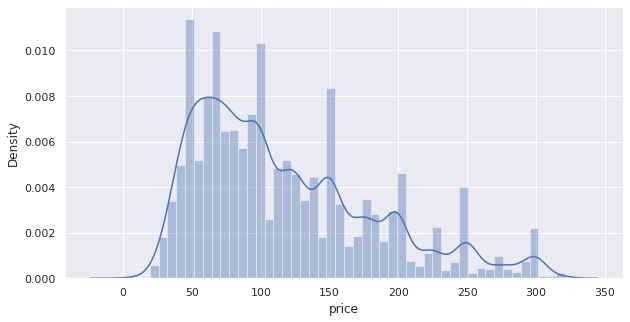

In [47]:
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.distplot(new_data['price'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


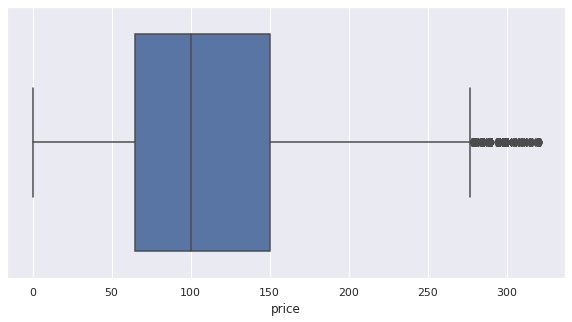

In [48]:
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.boxplot(new_data['price'])

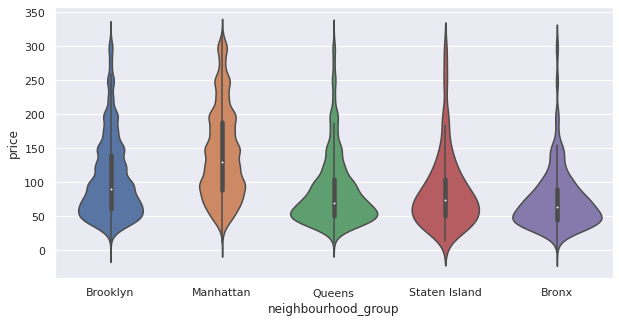

In [49]:
plt.rcParams['figure.figsize'] = (10, 5)
ax= sns.violinplot(x='neighbourhood_group',y='price',data=new_data)
# Apart from Manhattan rest of all four places having their listing mostly about to 50$ only. 

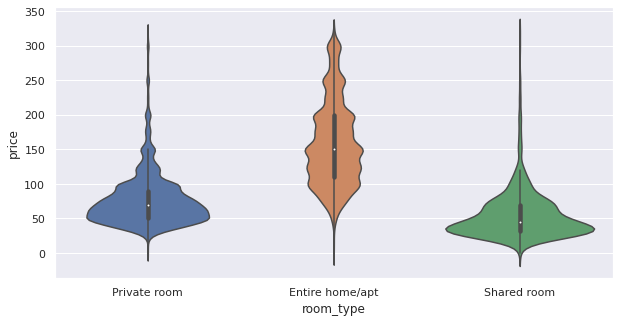

In [50]:
ax= sns.violinplot(x='room_type',y='price',data=new_data)
# In entrie Home catagory most of listing are in range of 100-200, but in rest of 2 catogories most of listing are about to 50$ only.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


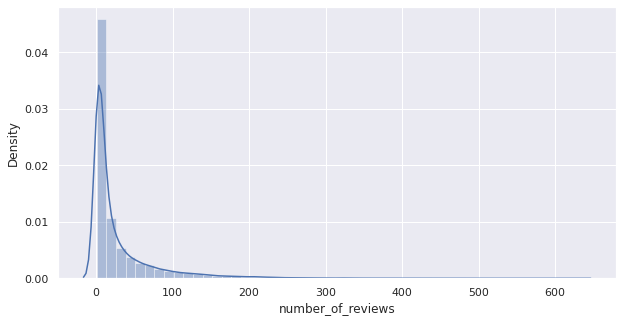

In [51]:
reviews=cdf['number_of_reviews']
sns.distplot(reviews, hist=True)

## Number Of Reviews

In [81]:
df[df['number_of_reviews']==0].count()

id                                10052
name                              10042
host_id                           10052
host_name                         10047
neighbourhood_group               10052
neighbourhood                     10052
latitude                          10052
longitude                         10052
room_type                         10052
price                             10052
minimum_nights                    10052
number_of_reviews                 10052
last_review                           0
reviews_per_month                     0
calculated_host_listings_count    10052
availability_365                  10052
dtype: int64

In [77]:
cdf[cdf['number_of_reviews']==0].count()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [78]:
Properties_having_reviews_1_to_10=cdf['number_of_reviews'].value_counts()[0:10]

In [79]:
sum(Properties_having_reviews_1_to_10)

20271

There are 20271 properties which having less than 10 reviews only. This is almost 45% of total listing.

Text(0.5, 0, 'Reviews')

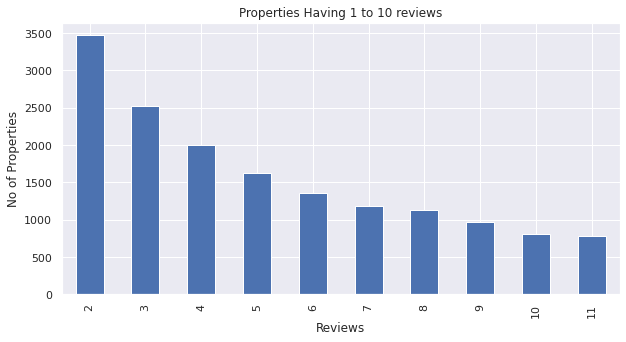

In [55]:
plt.rcParams['figure.figsize'] = (10, 5)
Properties_having_reviews_1_to_10.plot(kind='bar')
plt.title('Properties Having 1 to 10 reviews')
plt.ylabel('No of Properties')
plt.xlabel('Reviews')

In [56]:
cdf['number_of_reviews'].sort_values()[-10:]

471      480
4870     488
20403    510
1879     540
10623    543
13495    576
2015     594
2030     597
2031     607
11759    629
Name: number_of_reviews, dtype: int64

In [83]:
rev_data=cdf.sort_values(by='number_of_reviews',ascending=False)[['name','neighbourhood_group','number_of_reviews','host_name','room_type']][:10]
rev_data

,name,neighbourhood_group,number_of_reviews,host_name,room_type
11759,Room near JFK Queen Bed,Queens,629,Dona,Private room
2031,Great Bedroom in Manhattan,Manhattan,607,Jj,Private room
2030,Beautiful Bedroom in Manhattan,Manhattan,597,Jj,Private room
2015,Private Bedroom in Manhattan,Manhattan,594,Jj,Private room
13495,Room Near JFK Twin Beds,Queens,576,Dona,Private room
10623,Steps away from Laguardia airport,Queens,543,Maya,Private room
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,Manhattan,540,Carol,Private room
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Queens,510,Danielle,Private room
4870,Private brownstone studio Brooklyn,Brooklyn,488,Asa,Entire home/apt
471,LG Private Room/Family Friendly,Brooklyn,480,Wanda,Private room


## Minimum Nights

In [58]:
Minimum_nights_by_host=cdf['minimum_nights']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


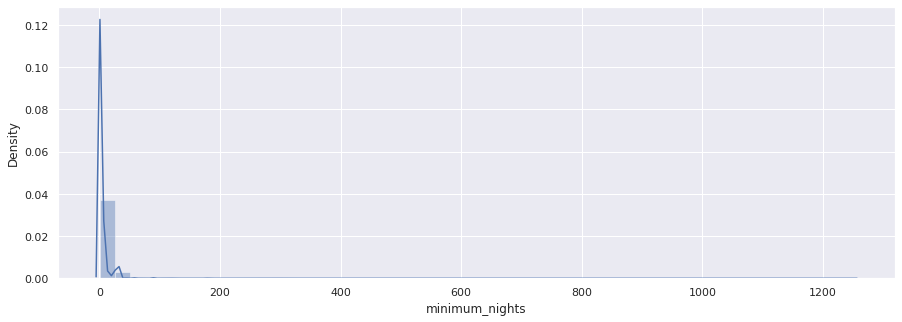

In [59]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(Minimum_nights_by_host, hist=True)


## Calculated Host Listing count

In [85]:
df['calculated_host_listings_count'].max()

327

In [86]:
df['calculated_host_listings_count'].min()

1

In [62]:
mulitipul_list_by_host=df['calculated_host_listings_count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


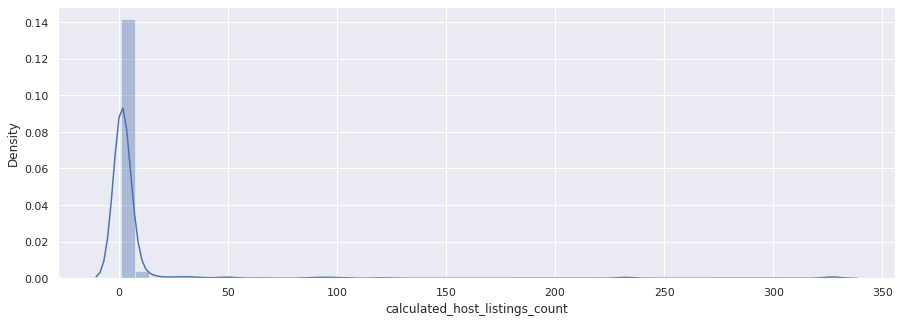

In [63]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(mulitipul_list_by_host, hist=True)

## Hostname & Host Id

In [64]:
cdf['host_id'].nunique()

30251

In [65]:
cdf['host_name'].nunique()

9887

From above two cell we can conform that no of unique host id are not equal to host name. we can conform that some host name are common. 

In [66]:
Host_having_multipul_property_listing=cdf['host_id'].value_counts()[:20]

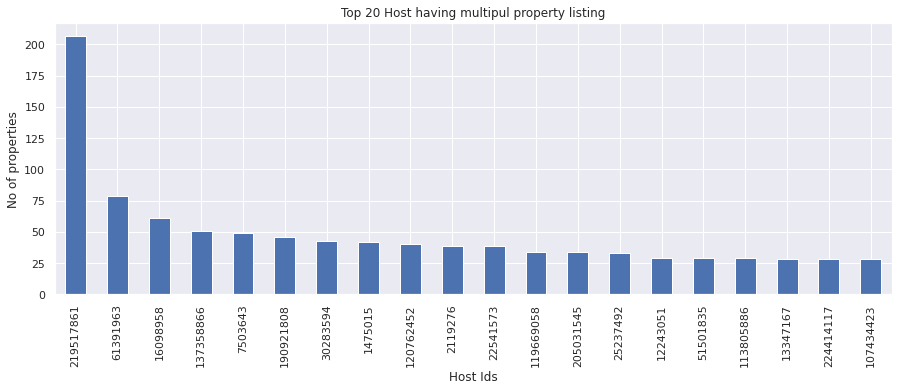

In [67]:
Host_having_multipul_property_listing.plot(kind='bar')
plt.title('Top 20 Host having multipul property listing')
plt.ylabel('No of properties')
plt.xlabel('Host Ids')

# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (12, 5)

Text(0.5, 1.0, 'Top 20 Host having multipul property listing')

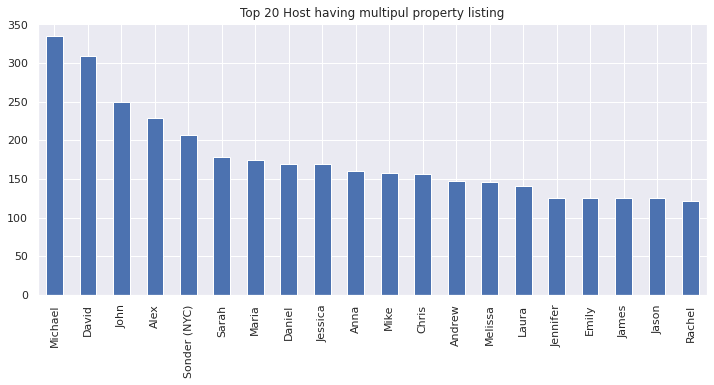

In [87]:
a=cdf['host_name'].value_counts()[:20]
a.plot(kind='bar')
plt.title('Top 20 Host having multipul property listing By Name')

## Availiblity 365

In [88]:
df['availability_365'].max()

365

In [89]:
df[df['availability_365']==df['availability_365'].max()].count()

id                                1295
name                              1294
host_id                           1295
host_name                         1295
neighbourhood_group               1295
neighbourhood                     1295
latitude                          1295
longitude                         1295
room_type                         1295
price                             1295
minimum_nights                    1295
number_of_reviews                 1295
last_review                        841
reviews_per_month                  841
calculated_host_listings_count    1295
availability_365                  1295
dtype: int64

In [90]:
df[df['availability_365']==df['availability_365'].max()]['id'].nunique()

1295

In [91]:
df['availability_365'].min()

0

In [92]:
df[df['availability_365']==df['availability_365'].min()].count()

id                                17533
name                              17521
host_id                           17533
host_name                         17520
neighbourhood_group               17533
neighbourhood                     17533
latitude                          17533
longitude                         17533
room_type                         17533
price                             17533
minimum_nights                    17533
number_of_reviews                 17533
last_review                       12688
reviews_per_month                 12688
calculated_host_listings_count    17533
availability_365                  17533
dtype: int64

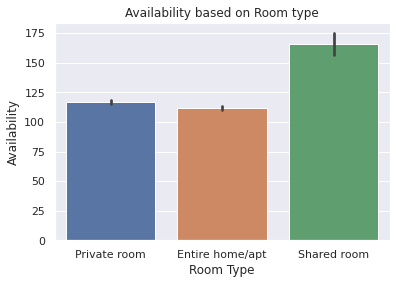

In [93]:
plt.figure(figsize=(6,4))
sns.barplot(x='room_type', y='availability_365', data=cdf)
plt.title('Availability based on Room type')
plt.ylabel('Availability')
plt.xlabel('Room Type')
plt.show()

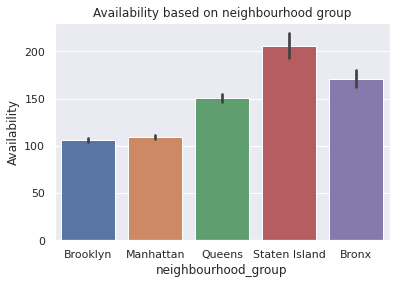

In [94]:
plt.figure(figsize=(6,4))
sns.barplot(x='neighbourhood_group', y='availability_365', data=cdf)
plt.title('Availability based on neighbourhood group')
plt.ylabel('Availability')
plt.xlabel('neighbourhood_group')
plt.show()

# Correlation

In [95]:
df.drop('id',axis=1,inplace=True)

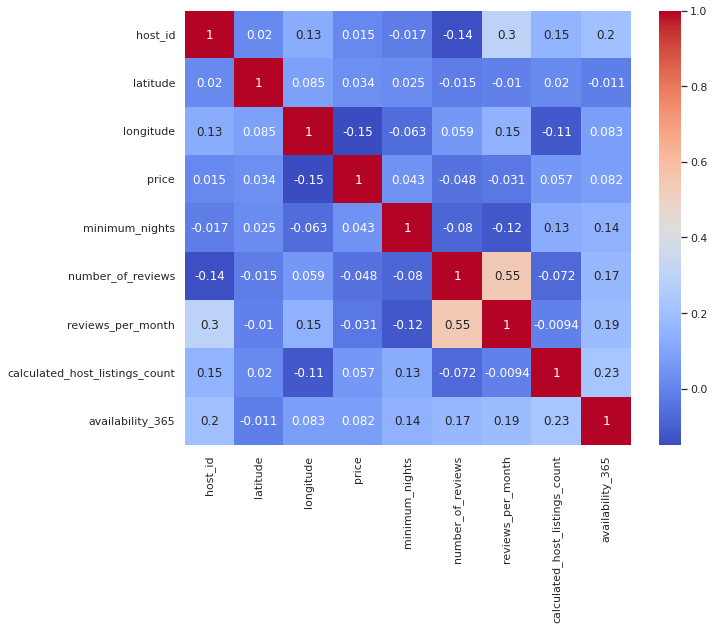

In [96]:
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')